In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/winequality-red.csv')

df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)


val_df = df.drop(train_df.index)



In [ ]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range


In [ ]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable

input_shape = [X_train.shape[1]]

input_shape


[11]

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

# after you create your model it's
# always a good habit to print out it's summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',

			loss='mae')

In [ ]:
losses = model.fit(X_train, y_train,

				validation_data=(X_val, y_val),

				batch_size=256,
				epochs=50,

				)


Epoch 1/50
5/5 [==============================] - 1s 52ms/step - loss: 0.5835 - val_loss: 0.4905
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.4387 - val_loss: 0.3528
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3002 - val_loss: 0.2138
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.1716 - val_loss: 0.1320
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1383 - val_loss: 0.1493
Epoch 6/50
5/5 [==============================] - 0s 14ms/step - loss: 0.1545 - val_loss: 0.1432
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1378 - val_loss: 0.1248
Epoch 8/50
5/5 [==============================] - 0s 14ms/step - loss: 0.1252 - val_loss: 0.1217
Epoch 9/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1233 - val_loss: 0.1192
Epoch 10/50
5/5 [==============================] - 0s 9ms/step - loss: 0.1201 - val_loss: 0.1129
Epoch 11/50
5/5 [=============

In [ ]:
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 95ms/step


array([[0.4030485 ],
       [0.4992301 ],
       [0.39063123]], dtype=float32)

In [ ]:

y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

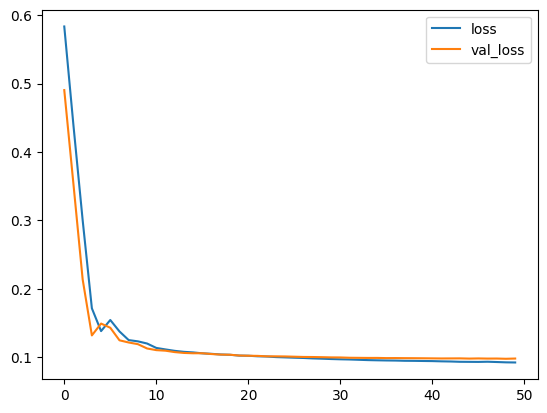

In [ ]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['loss','val_loss']].plot()